### Teamwork-Supervised Learing
#### Team members: Meiran, Lishengxi, Zhang Jingyuan.
This is a dataset about human activity classification, consisting of 4 labels and 272 features.
 

#### 1. Data Pre-processing

In [1]:
# import sth
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read data
df = pd.read_csv('dataset.csv')
features = df.iloc[:, :-1]  # read feature
labels = df.iloc[:, -1]  # read label

#show data
df

,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,Energy_R_mag_y,Mean_R_mag_z,Range_R_mag_z,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,Label
0,117.5125,558.0,192.587460,1.271066,-0.034507,0.1783,-6713.7825,5.169266e+09,277.9850,1182.0,...,7.496750e+11,-742.663500,2841.75,598.380021,-0.946787,0.388256,0.2209,-46145.2712,1.168251e+11,downstairs
1,285.1325,1971.0,401.841201,2.244358,6.043515,0.1975,-19239.4775,2.589390e+10,420.2875,1761.0,...,9.030018e+11,-1038.084000,9676.80,1541.107858,1.504357,3.399815,0.0923,-169453.8976,3.620066e+11,downstairs
2,313.2925,1971.0,381.109542,2.439065,7.363269,0.2213,-19343.9062,2.729488e+10,566.8250,1761.0,...,1.339132e+12,-73.130250,9676.80,1926.697832,0.107699,-0.447804,0.0746,-163430.8428,2.971493e+11,downstairs
3,434.2375,1827.0,469.269182,1.121957,0.400659,0.2205,-26250.3631,4.774304e+10,729.2575,1849.0,...,7.376860e+11,338.552625,9254.40,1866.520614,-0.332954,0.596910,0.0591,-161704.5013,2.963615e+11,downstairs
4,544.0150,1827.0,509.326510,0.511355,-0.782151,0.2836,-28204.0649,6.805367e+10,870.6200,1948.0,...,8.535439e+11,-340.024500,9638.40,2836.116267,0.133436,-1.230015,0.0484,-271355.1914,6.604581e+11,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,16.7275,132.0,41.550504,2.160707,2.705326,0.0846,-954.9611,1.825534e+08,19.8350,138.0,...,3.290809e+11,317.647875,4377.75,1163.692101,0.634335,-0.464264,0.1492,-58224.3614,1.242148e+11,spinning_bike
1196,11.9650,131.0,35.589751,2.741499,5.563885,0.0666,-751.4789,1.239845e+08,22.5400,138.0,...,3.434682e+11,272.236500,4300.95,1123.310678,0.609906,-0.415838,0.1752,-49310.4697,1.125520e+11,spinning_bike
1197,9.6675,128.0,31.223215,3.083986,7.631802,0.0601,-613.5523,9.275006e+07,23.3450,131.0,...,3.763346e+11,293.253750,4262.55,1180.292592,0.534295,-0.736452,0.1817,-52894.6522,1.249284e+11,spinning_bike
1198,11.6675,128.0,34.012705,2.707855,5.437852,0.0736,-698.6110,1.140998e+08,28.0450,134.0,...,3.678775e+11,378.217875,4492.95,1229.547258,0.393128,-0.998344,0.2093,-51164.6533,1.435290e+11,spinning_bike


In [3]:
# replace NaN
features.fillna(features.mean(), inplace=True)
df = pd.concat([features, labels], axis=1)

# Check if there are any missing values in the DataFrame
if df.isna().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [4]:
# features noemalized
features_normalized = features.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

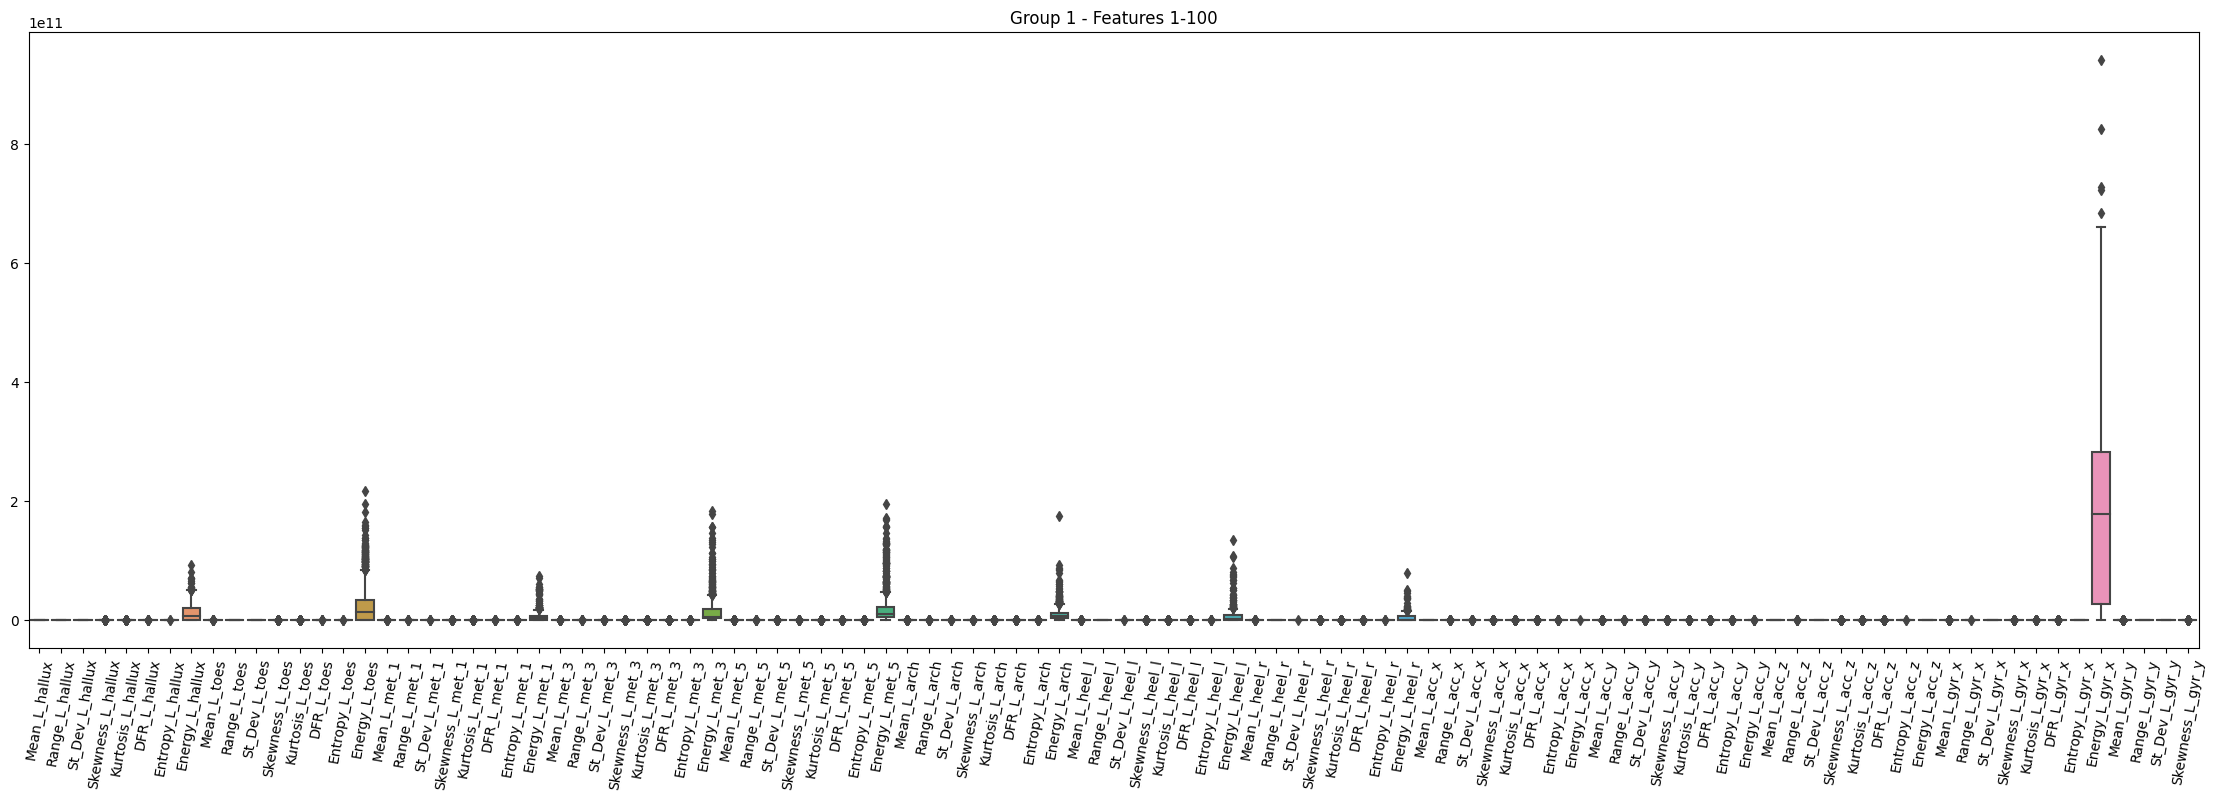

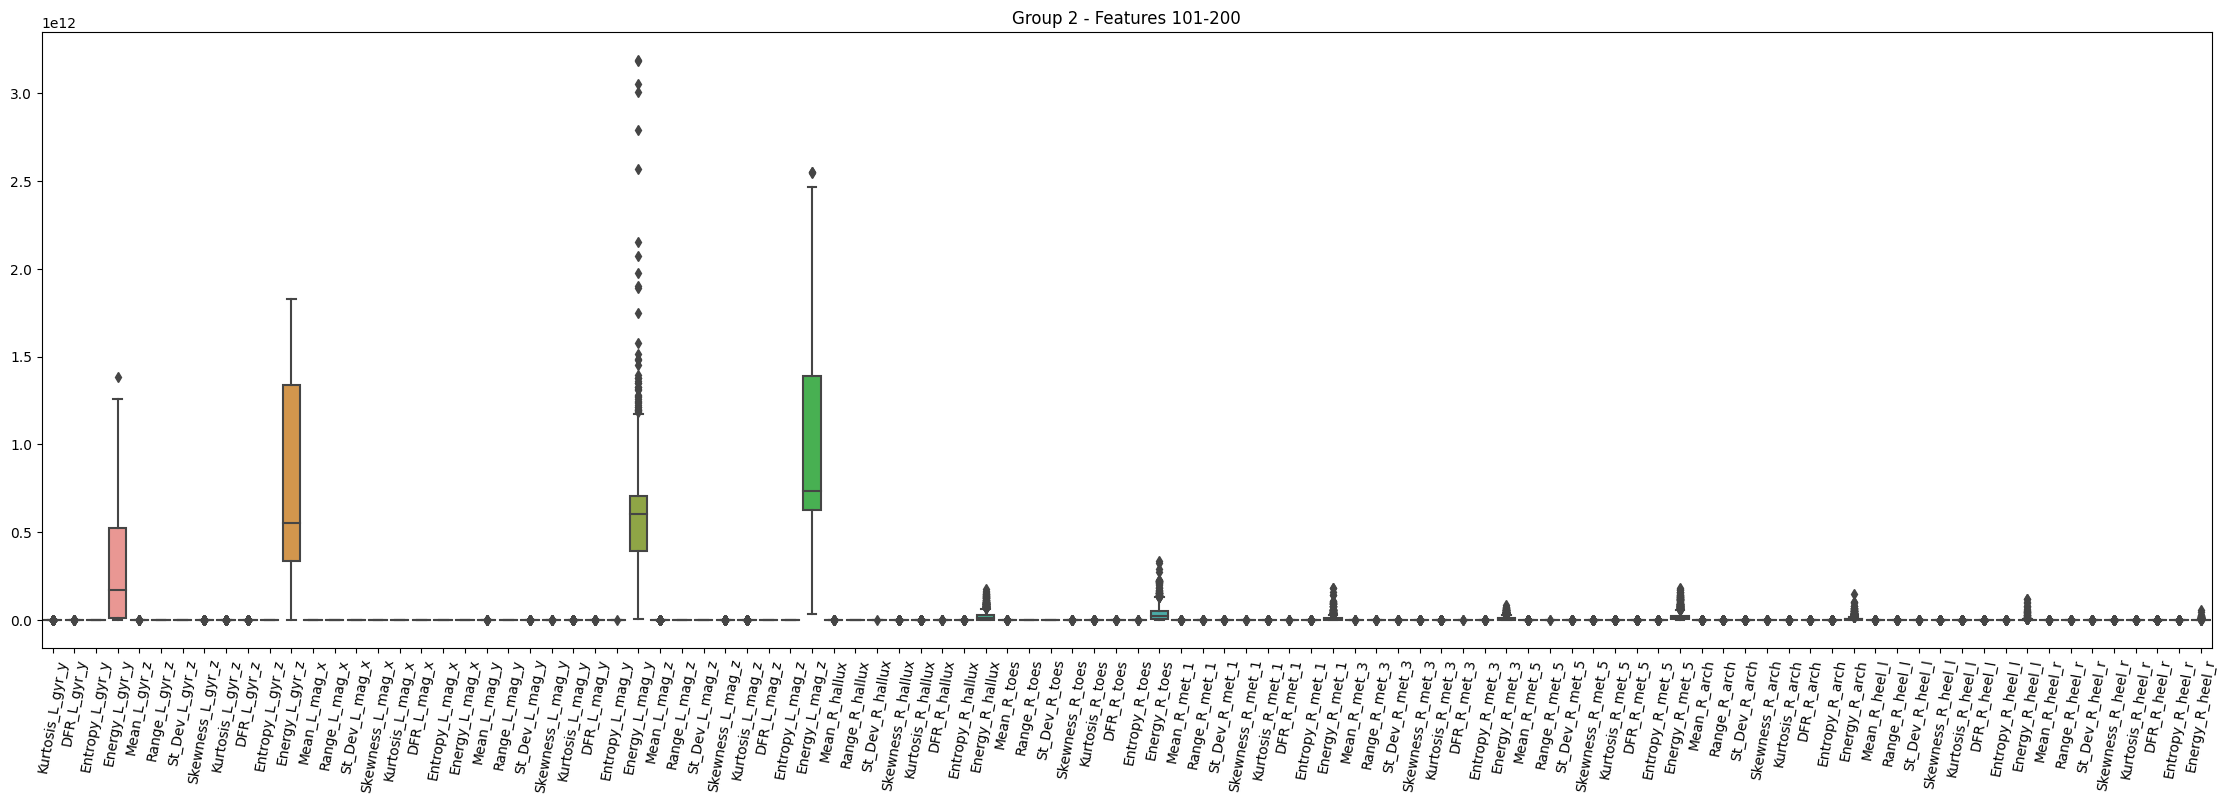

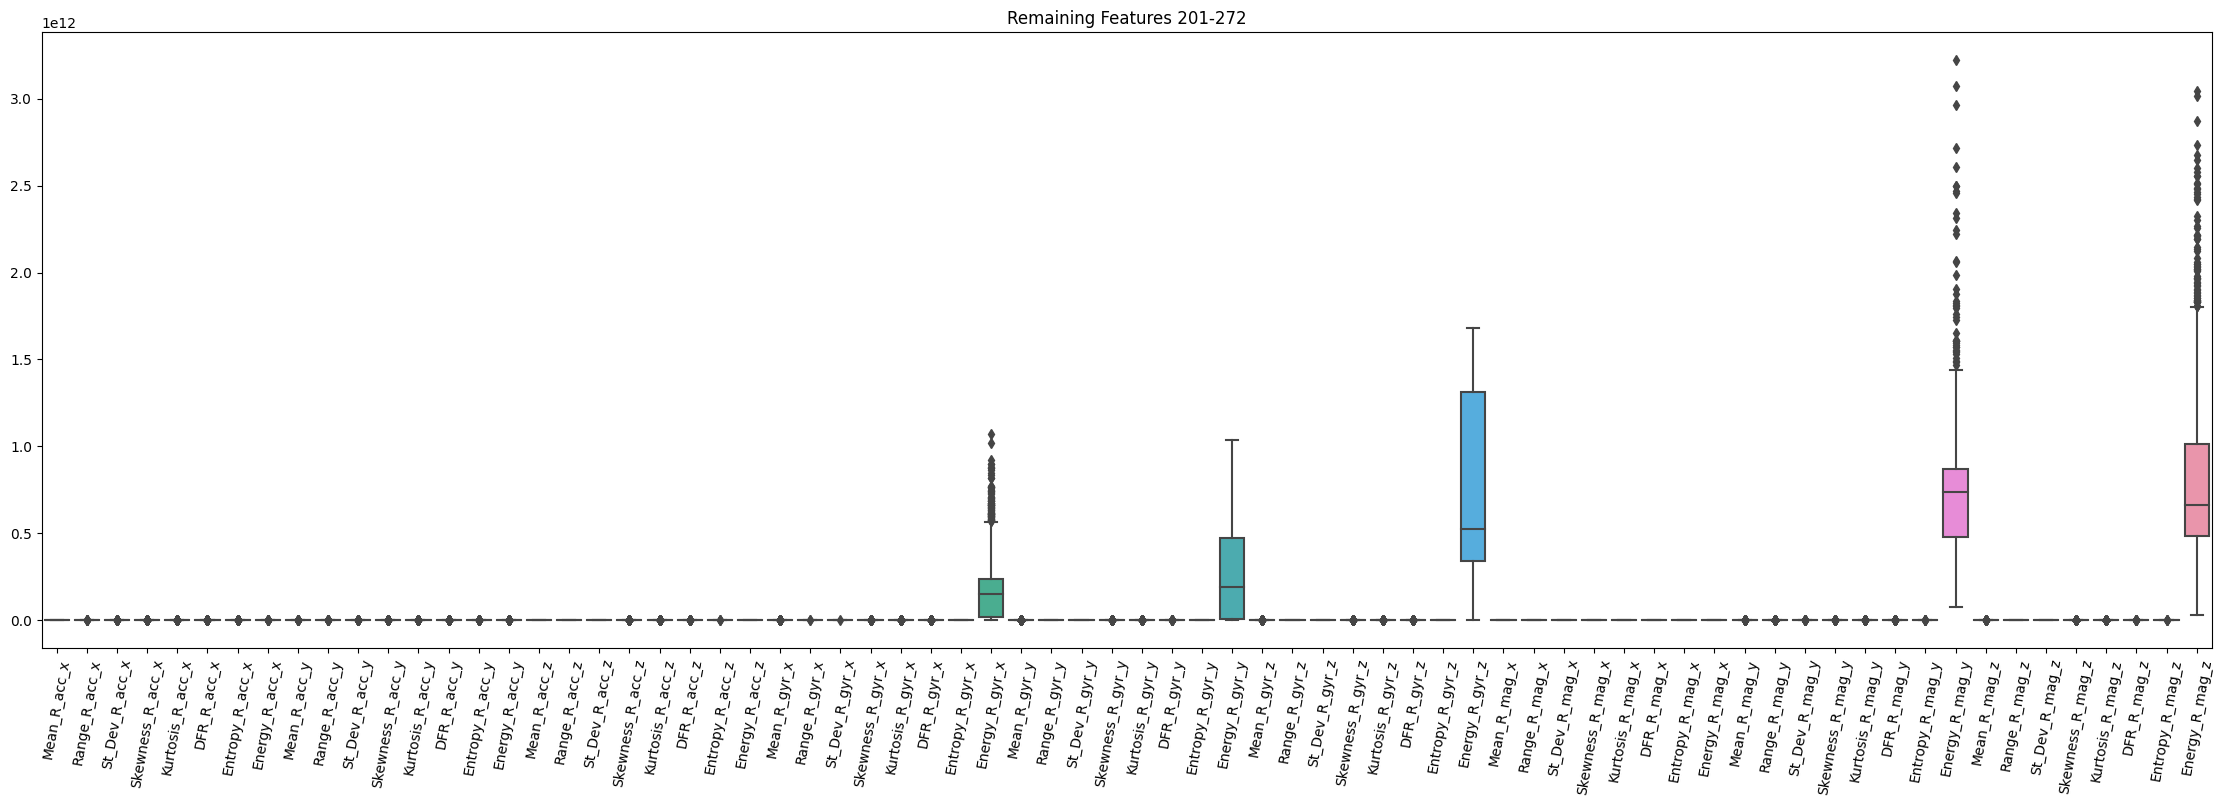

In [5]:
# draw boxplot
num_features = features.shape[1] # feature_size
group_size = 100 
num_groups = num_features // group_size 

# set figure size
fig_length = 28
fig_height = 8
sns.set_context({'figure.figsize':[28, 8]})

# draw by groups
for i in range(num_groups):
    start_index = i * group_size
    end_index = start_index + group_size

    group_features = features.iloc[:, start_index:end_index]  # read current group
    ax = sns.boxplot(data=group_features)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    plt.title(f"Group {i+1} - Features {start_index+1}-{end_index}")
    plt.show()

#draw remain features
remaining_features = features.iloc[:, num_groups * group_size:]  # read remain features
rx = sns.boxplot(data=remaining_features)
rx.set_xticklabels(rx.get_xticklabels(), rotation=80)
plt.title(f"Remaining Features {num_groups * group_size + 1}-{num_features}")
plt.show()

In [6]:
#remove non-change features
features_std = np.std(features) #std==0 show that do not change
unchanged_features = features_std[features_std== 0].index
features_a = features_normalized.drop(unchanged_features, axis=1)

data_a = pd.concat([features_a, labels], axis=1)
data_a

,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,Energy_R_mag_y,Mean_R_mag_z,Range_R_mag_z,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,Label
0,-0.261407,-0.375994,-0.096893,-0.339257,-0.385994,0.043268,0.264004,-0.486669,0.284275,0.290018,...,0.017175,-0.578039,-1.497219,-1.421592,-0.998115,-0.042488,0.163474,1.323599,-1.247223,downstairs
1,1.072329,1.852412,1.182899,0.483672,0.325498,0.282947,-1.370701,1.047182,0.953450,1.041700,...,0.441388,-0.759658,0.859438,-0.407983,1.126621,0.388954,-0.623955,0.125284,-0.794996,downstairs
2,1.296395,1.852412,1.056104,0.648298,0.479988,0.580048,-1.384330,1.150870,1.642541,1.041700,...,1.648041,-0.166425,0.859438,0.006599,-0.084050,-0.162264,-0.732333,0.183816,-0.914623,downstairs
3,2.258742,1.625314,1.595287,-0.465330,-0.335054,0.570062,-2.285678,2.664260,2.406377,1.155945,...,-0.015996,0.086669,0.713799,-0.058103,-0.466024,-0.012596,-0.827241,0.200593,-0.916076,downstairs
4,3.132231,1.625314,1.840277,-0.981600,-0.473513,1.357757,-2.540652,4.167471,3.071132,1.284471,...,0.304552,-0.330505,0.846198,0.984394,-0.061741,-0.274325,-0.892758,-0.864994,-0.244515,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.063343,-1.047828,-1.020633,0.412944,-0.065270,-1.126415,1.015577,-0.855741,-0.929671,-1.065345,...,-1.146495,0.073818,-0.967621,-0.813776,0.372456,-0.164622,-0.275551,1.206215,-1.233593,spinning_bike
1196,-1.101238,-1.049405,-1.057089,0.904010,0.269353,-1.351114,1.042133,-0.860076,-0.916951,-1.065345,...,-1.106689,0.045900,-0.994101,-0.857193,0.351280,-0.157684,-0.116351,1.292840,-1.255105,spinning_bike
1197,-1.119519,-1.054137,-1.083794,1.193585,0.511423,-1.432255,1.060134,-0.862388,-0.913166,-1.074433,...,-1.015757,0.058821,-1.007341,-0.795927,0.285738,-0.203616,-0.076551,1.258009,-1.232277,spinning_bike
1198,-1.103605,-1.054137,-1.066734,0.875563,0.254599,-1.263731,1.049033,-0.860808,-0.891064,-1.070538,...,-1.039155,0.111055,-0.927902,-0.742969,0.163370,-0.241135,0.092446,1.274821,-1.197969,spinning_bike


In [7]:
# two ways to remove outliers
#delete outliers
def remove_outliers_all(data):
    
    features = data.iloc[:, :-1]
    labels = data.iloc[:, -1]
    
    Q1 = features.quantile(0.25)
    Q3 = features.quantile(0.75)
    
    # Calculate interquartile range
    IQR = Q3 - Q1
    
    # Determine the threshold range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for i, row in features.iterrows():
        # Remove outliers from the current row
        for column in features.columns:
            if row[column] < lower_bound[column] or row[column] > upper_bound[column]:
                row[column] = None  # Set outlier values to None
        
        # Remove corresponding labels for rows with outliers
        if row.isnull().any():
            labels.loc[i] = None
    
    # Drop rows with missing values in features and labels
    features.dropna(inplace=True)
    labels.dropna(inplace=True)

    data_res = pd.concat([features, labels], axis=1)
    return data_res

#replace by mean
def remove_outliers_mean(data):
    
    features = data.iloc[:, :-1]
    labels = data.iloc[:, -1]
    
    Q1 = features.quantile(0.25)
    Q3 = features.quantile(0.75)
    mean_f = np.mean(features)
    
    # Calculate interquartile range
    IQR = Q3 - Q1
    
    # Determine the threshold range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    features = features.mask((features < lower_bound) | (features > upper_bound), other=mean_f, axis=1)
    
    data_res = pd.concat([features, labels], axis=1)
    return data_res

#show the data
remove_outliers_mean(data_a)


c:\Users\mr136\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,Energy_R_mag_y,Mean_R_mag_z,Range_R_mag_z,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,Label
0,-0.261407,-0.375994,-0.096893,-0.339257,-0.385994,0.043268,0.264004,-4.866694e-01,0.284275,0.290018,...,0.017175,-0.578039,-1.497219,-1.421592,-5.921189e-18,-4.248822e-02,0.163474,1.323599,-1.247223,downstairs
1,1.072329,1.852412,1.182899,0.483672,0.325498,0.282947,-1.370701,1.047182e+00,0.953450,1.041700,...,0.441388,-0.759658,0.859438,-0.407983,-5.921189e-18,-2.368476e-17,-0.623955,0.125284,-0.794996,downstairs
2,1.296395,1.852412,1.056104,0.648298,0.479988,0.580048,-1.384330,1.150870e+00,1.642541,1.041700,...,1.648041,-0.166425,0.859438,0.006599,-8.405040e-02,-1.622638e-01,-0.732333,0.183816,-0.914623,downstairs
3,2.258742,1.625314,1.595287,-0.465330,-0.335054,0.570062,-2.285678,2.664260e+00,2.406377,1.155945,...,-0.015996,0.086669,0.713799,-0.058103,-4.660236e-01,-1.259603e-02,-0.827241,0.200593,-0.916076,downstairs
4,3.132231,1.625314,1.840277,-0.981600,-0.473513,1.357757,-2.540652,1.184238e-17,0.000000,1.284471,...,0.304552,-0.330505,0.846198,0.984394,-6.174083e-02,-2.743248e-01,-0.892758,-0.864994,-0.244515,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.063343,-1.047828,-1.020633,0.412944,-0.065270,-1.126415,1.015577,-8.557412e-01,-0.929671,-1.065345,...,-1.146495,0.073818,-0.967621,-0.813776,3.724557e-01,-1.646219e-01,-0.275551,1.206215,-1.233593,spinning_bike
1196,-1.101238,-1.049405,-1.057089,0.904010,0.269353,-1.351114,1.042133,-8.600760e-01,-0.916951,-1.065345,...,-1.106689,0.045900,-0.994101,-0.857193,3.512796e-01,-1.576843e-01,-0.116351,1.292840,-1.255105,spinning_bike
1197,-1.119519,-1.054137,-1.083794,1.193585,0.511423,-1.432255,1.060134,-8.623877e-01,-0.913166,-1.074433,...,-1.015757,0.058821,-1.007341,-0.795927,2.857375e-01,-2.036161e-01,-0.076551,1.258009,-1.232277,spinning_bike
1198,-1.103605,-1.054137,-1.066734,0.875563,0.254599,-1.263731,1.049033,-8.608075e-01,-0.891064,-1.070538,...,-1.039155,0.111055,-0.927902,-0.742969,1.633696e-01,-2.411352e-01,0.092446,1.274821,-1.197969,spinning_bike


#### 2. Feature Extraction

In [8]:
# feature extraction and one_hot encoder

## tips: remove energy type?
def feature_extraction(data):
    
    features = data.iloc[:, :-1]
    labels = data.iloc[:, -1]

    '''
    in this function extract the features you will need for the remainder of the analysis.
    You should make some changes in the feature.
    The return value is in dataframe format. 
    '''
    # one hot encoder
    encoded_labels = pd.get_dummies(labels)

    # merge selected features and encoded labels
    data_res = pd.concat([features, encoded_labels], axis=1)
    
    return data_res

In [9]:
# remove outliers and feature extration
data_b = remove_outliers_mean(data_a)
data = feature_extraction(data_b)

#show final data
data

c:\Users\mr136\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Mean_L_hallux,Range_L_hallux,St_Dev_L_hallux,Skewness_L_hallux,Kurtosis_L_hallux,DFR_L_hallux,Entropy_L_hallux,Energy_L_hallux,Mean_L_toes,Range_L_toes,...,St_Dev_R_mag_z,Skewness_R_mag_z,Kurtosis_R_mag_z,DFR_R_mag_z,Entropy_R_mag_z,Energy_R_mag_z,downstairs,spinning_bike,upstairs,walking
0,-0.261407,-0.375994,-0.096893,-0.339257,-0.385994,0.043268,0.264004,-4.866694e-01,0.284275,0.290018,...,-1.421592,-5.921189e-18,-4.248822e-02,0.163474,1.323599,-1.247223,1,0,0,0
1,1.072329,1.852412,1.182899,0.483672,0.325498,0.282947,-1.370701,1.047182e+00,0.953450,1.041700,...,-0.407983,-5.921189e-18,-2.368476e-17,-0.623955,0.125284,-0.794996,1,0,0,0
2,1.296395,1.852412,1.056104,0.648298,0.479988,0.580048,-1.384330,1.150870e+00,1.642541,1.041700,...,0.006599,-8.405040e-02,-1.622638e-01,-0.732333,0.183816,-0.914623,1,0,0,0
3,2.258742,1.625314,1.595287,-0.465330,-0.335054,0.570062,-2.285678,2.664260e+00,2.406377,1.155945,...,-0.058103,-4.660236e-01,-1.259603e-02,-0.827241,0.200593,-0.916076,1,0,0,0
4,3.132231,1.625314,1.840277,-0.981600,-0.473513,1.357757,-2.540652,1.184238e-17,0.000000,1.284471,...,0.984394,-6.174083e-02,-2.743248e-01,-0.892758,-0.864994,-0.244515,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.063343,-1.047828,-1.020633,0.412944,-0.065270,-1.126415,1.015577,-8.557412e-01,-0.929671,-1.065345,...,-0.813776,3.724557e-01,-1.646219e-01,-0.275551,1.206215,-1.233593,0,1,0,0
1196,-1.101238,-1.049405,-1.057089,0.904010,0.269353,-1.351114,1.042133,-8.600760e-01,-0.916951,-1.065345,...,-0.857193,3.512796e-01,-1.576843e-01,-0.116351,1.292840,-1.255105,0,1,0,0
1197,-1.119519,-1.054137,-1.083794,1.193585,0.511423,-1.432255,1.060134,-8.623877e-01,-0.913166,-1.074433,...,-0.795927,2.857375e-01,-2.036161e-01,-0.076551,1.258009,-1.232277,0,1,0,0
1198,-1.103605,-1.054137,-1.066734,0.875563,0.254599,-1.263731,1.049033,-8.608075e-01,-0.891064,-1.070538,...,-0.742969,1.633696e-01,-2.411352e-01,0.092446,1.274821,-1.197969,0,1,0,0


#### 3. Supervised Classification

In [10]:
# import some model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Customized data combination method facilitates the subsequent processing of performance evaluation indicators
modelsets = []
models = []


In [11]:
# define train and test function
def train(train_inputs,train_targets,val_inputs,val_targets):

    #KNN model
    model1 = KNeighborsClassifier(n_neighbors=1)
    model1.fit(train_inputs, train_targets)
    val_score1 = model1.score(val_inputs, val_targets)
    print(f"The score for KNN on the validation set is {val_score1}")
    models.append(model1)
    
    #SVM model
    model2 = SVC(kernel="rbf", C=0.9)
    train_targets_S = np.argmax(train_targets, axis=1)
    model2.fit(train_inputs, train_targets_S)
    val_targets_S = np.argmax(val_targets, axis=1)
    val_score2 = model2.score(val_inputs, val_targets_S)
    print(f"The score for SVM on the validation set is {val_score2}")
    models.append(model2)

    #xgboost model
    model3 = xgb.XGBClassifier()
    model3.fit(train_inputs, train_targets_S)
    val_predictions = model3.predict(val_inputs)
    val_score3 = accuracy_score(val_targets_S, val_predictions)
    print(f"The score for Xgboost on the validation set is {val_score3}")
    models.append(model3)
    
    '''
    more model we need!
    dont forget to append val_scorex and modelx and another type in test fuction!!!
    '''
    
    # get best model
    value_list = [val_score1,val_score2,val_score3]
    model_list = [model1,model2,model3]
    max_index = value_list.index(max(value_list))

    return model_list[max_index] , max(value_list)


def test(test_inputs, test_targets , best_model):
    

    # choose different type , so there will be a little change
    if type(best_model) == sklearn.neighbors.KNeighborsClassifier:
        test_score = best_model.score(test_inputs, test_targets)
        print(f"The score for best_KNN on the test set is {test_score}")
    
    elif type(best_model) == sklearn.svm.SVC:
        test_targets_S = np.argmax(test_targets, axis=1)
        test_score = best_model.score(test_inputs, test_targets)
        print(f"The score for best_SVM on the test set is {test_score}")
    
    elif type(best_model) == xgb.XGBClassifier:
        test_targets_S = np.argmax(test_targets, axis=1)
        test_predictions = best_model.predict(test_inputs)
        test_score = accuracy_score(test_targets_S, test_predictions)
        print(f"The score for best_xgb on the test set is {test_score}")

    

In [12]:
# K-Folder train and test
from sklearn.model_selection import train_test_split, KFold

data_shuffled = data.sample(frac=1, random_state=42)

# Split the dataset into training and test sets
train_data, test_data = train_test_split(data_shuffled, test_size=0.2, random_state=42)

# Use k-fold cross-validation
k = 5  # Set the value of k
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Initialize  best model and model best score 
best_model = None
best_score = 0

# Perform k-fold cross-validation on the training set
for train_index, val_index in kf.split(train_data):
    train_fold_data, val_fold_data = train_data.iloc[train_index], train_data.iloc[val_index]
    
    # Get the inputs and labels
    train_inputs = train_fold_data.iloc[:, :-4].values
    train_targets = train_fold_data.iloc[:, -4:].values
    val_inputs = val_fold_data.iloc[:, :-4].values
    val_targets = val_fold_data.iloc[:, -4:].values
    
    # Train and evaluate the model on each fold
    current_best_model, current_best_score = train(train_inputs,train_targets, val_inputs, val_targets)

    # get best score
    if current_best_score > best_score:
        best_model = current_best_model
        best_score = current_best_score   

# Get the test inputs and labels
test_inputs = test_data.iloc[:, :-4].values
test_targets = test_data.iloc[:, -4:].values

The score for KNN on the validation set is 0.9947916666666666
The score for SVM on the validation set is 0.984375
The score for Xgboost on the validation set is 1.0
The score for KNN on the validation set is 0.9895833333333334
The score for SVM on the validation set is 0.9947916666666666
The score for Xgboost on the validation set is 1.0
The score for KNN on the validation set is 0.9895833333333334
The score for SVM on the validation set is 0.984375
The score for Xgboost on the validation set is 0.984375
The score for KNN on the validation set is 0.9791666666666666
The score for SVM on the validation set is 0.9739583333333334
The score for Xgboost on the validation set is 0.96875
The score for KNN on the validation set is 0.9947916666666666
The score for SVM on the validation set is 0.9947916666666666
The score for Xgboost on the validation set is 0.9947916666666666


In [13]:
# Evaluate the final model using the test set
test(test_inputs,test_targets,best_model)

The score for best_xgb on the test set is 0.9916666666666667


In [14]:
# Get performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def generate_metrics_table(model_set):
    metrics = []  # List to store the metrics for each model

    for model,test_targets,predictions in model_set:
        # Get model name
        model_name = model.__class__.__name__

        # Compute the performance metrics
        # cm = confusion_matrix(test_targets, predictions)
        accuracy = accuracy_score(test_targets, predictions)
        precision = precision_score(test_targets, predictions,average='macro')
        recall = recall_score(test_targets, predictions,average='macro')
        f1 = f1_score(test_targets, predictions,average='macro')
        # auc = roc_auc_score(test_targets, predictions, average='samples',multi_class='ovo')

        # Create a dictionary with the metrics
        model_metrics = {
            'Model': model_name,
            # 'Confusion Matrix': cm,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            # 'AUC': auc
        }

        metrics.append(model_metrics)

    # Create a DataFrame from the metrics list
    metrics_df = pd.DataFrame(metrics)

    return metrics_df

In [15]:
# Bind model with test inputs and test targets
def model_binding(models,test_inputs,test_targets):
    for model in models:
        # choose different type , so there will be a little change
        if type(model) == sklearn.neighbors.KNeighborsClassifier:
            test_targets_tmp = test_targets
        
        elif type(model) == sklearn.svm.SVC:
            test_targets_tmp = np.argmax(test_targets, axis=1)
        
        elif type(model) == xgb.XGBClassifier:
            test_targets_tmp = np.argmax(test_targets, axis=1)
        
        #predict
        predictions = model.predict(test_inputs)
        
        #bind and append
        model_tuple = (model,test_targets_tmp,predictions)
        modelsets.append(model_tuple)

In [16]:
# Bind and generate metrics table
model_binding(models, test_inputs, test_targets)
ans = generate_metrics_table(modelsets)

# show table
ans

,Model,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,0.995833,0.995833,0.995455,0.995606
1,SVC,0.987500,0.987903,0.986364,0.986792
2,XGBClassifier,0.991667,0.991228,0.991525,0.991225
3,KNeighborsClassifier,0.987500,0.986599,0.986980,0.986751
4,SVC,0.991667,0.991217,0.991217,0.991217
5,XGBClassifier,0.983333,0.982435,0.982435,0.982435
6,KNeighborsClassifier,0.995833,0.995833,0.995455,0.995606
7,SVC,0.987500,0.987903,0.986364,0.986792
8,XGBClassifier,0.983333,0.982435,0.982435,0.982435
9,KNeighborsClassifier,0.991667,0.991217,0.991217,0.991217


#### 4. Summary and Discussion

fucking cufusion matrix and fucking auc!!!!!!